In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns



# Importing Data

In [3]:
df = pd.read_csv('wind_dataset.csv')

In [4]:
df.head()

,DATE,WIND,IND,RAIN,IND.1,T.MAX,IND.2,T.MIN,T.MIN.G
0,1961-01-01,13.67,0,0.2,0.0,9.5,0.0,3.7,-1.0
1,1961-01-02,11.50,0,5.1,0.0,7.2,0.0,4.2,1.1
2,1961-01-03,11.25,0,0.4,0.0,5.5,0.0,0.5,-0.5
3,1961-01-04,8.63,0,0.2,0.0,5.6,0.0,0.4,-3.2
4,1961-01-05,11.92,0,10.4,0.0,7.2,1.0,-1.5,-7.5


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6574 entries, 0 to 6573
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   DATE     6574 non-null   object 
 1   WIND     6574 non-null   float64
 2   IND      6574 non-null   int64  
 3   RAIN     6574 non-null   float64
 4   IND.1    6513 non-null   float64
 5   T.MAX    5953 non-null   float64
 6   IND.2    6513 non-null   float64
 7   T.MIN    5900 non-null   float64
 8   T.MIN.G  6214 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 462.4+ KB


# Cleaning Up Data

In [6]:
# We need to convert the DATE dtype from object to a datetime

df['DATE'] = pd.to_datetime(df['DATE'])

df['MONTH'] = df['DATE'].dt.month
df=df.drop('DATE',axis=1)

In [7]:
df.head()

,WIND,IND,RAIN,IND.1,T.MAX,IND.2,T.MIN,T.MIN.G,MONTH
0,13.67,0,0.2,0.0,9.5,0.0,3.7,-1.0,1
1,11.50,0,5.1,0.0,7.2,0.0,4.2,1.1,1
2,11.25,0,0.4,0.0,5.5,0.0,0.5,-0.5,1
3,8.63,0,0.2,0.0,5.6,0.0,0.4,-3.2,1
4,11.92,0,10.4,0.0,7.2,1.0,-1.5,-7.5,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6574 entries, 0 to 6573
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   WIND     6574 non-null   float64
 1   IND      6574 non-null   int64  
 2   RAIN     6574 non-null   float64
 3   IND.1    6513 non-null   float64
 4   T.MAX    5953 non-null   float64
 5   IND.2    6513 non-null   float64
 6   T.MIN    5900 non-null   float64
 7   T.MIN.G  6214 non-null   float64
 8   MONTH    6574 non-null   int32  
dtypes: float64(7), int32(1), int64(1)
memory usage: 436.7 KB


In [9]:
# Check for null values

df.isnull().sum().sum()

1777

<Axes: >

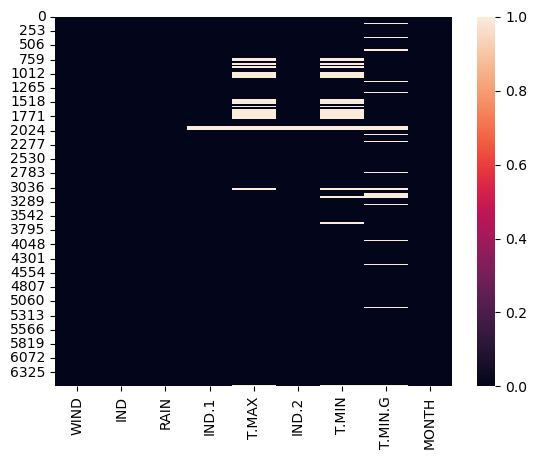

In [10]:
sns.heatmap(df.isnull())

In [11]:
df.isna().sum()

WIND         0
IND          0
RAIN         0
IND.1       61
T.MAX      621
IND.2       61
T.MIN      674
T.MIN.G    360
MONTH        0
dtype: int64

In [12]:
# Filling these Values with 0

df.fillna(0, inplace=True)
df.isnull().sum().sum()

0

# Visualization

<Axes: >

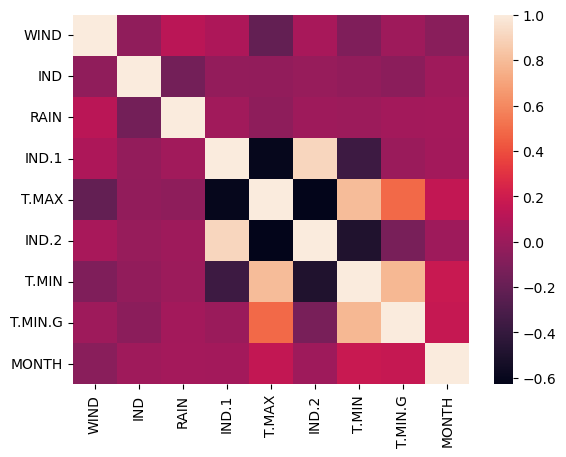

In [13]:
sns.heatmap(df.corr())

As we can see that the wind is more positively correlated to rain

# Machine Learning

Since this is a Regression Problem and we need to predict Average Wind Speed, we'll be using:
* Linear Regression
* Decision Tree
* Random Forest

In [14]:
X = df.drop(['WIND'], axis=1)
y = df['WIND']

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=123)

print('Training dataset shape:', X_train.shape, y_train.shape)
print('Testing dataset shape:', X_test.shape, y_test.shape)

Training dataset shape: (4404, 8) (4404,)
Testing dataset shape: (2170, 8) (2170,)


In [16]:
# Linear Regression

from sklearn.linear_model import LinearRegression
from sklearn import metrics

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
lin_pred = lin_reg.predict(X_test)

print('MAE:', metrics.mean_absolute_error(y_test, lin_pred))
print('MSE:', metrics.mean_squared_error(y_test, lin_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lin_pred)))

MAE: 3.8313431467114323
MSE: 22.83565119207383
RMSE: 4.77866625661113


In [17]:
# Decision Tree

from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
dtr_pred = dtr.predict(X_test)

print('MAE:', metrics.mean_absolute_error(y_test, dtr_pred))
print('MSE:', metrics.mean_squared_error(y_test, dtr_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, dtr_pred)))

MAE: 4.7702175115207375
MSE: 36.321418955760365
RMSE: 6.026725392429985


In [18]:
# Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(max_depth=2, random_state=0)
rfr.fit(X_train, y_train)
rfr_pred = rfr.predict(X_test)

print('MAE:', metrics.mean_absolute_error(y_test, rfr_pred))
print('MSE:', metrics.mean_squared_error(y_test, rfr_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rfr_pred)))

MAE: 3.7144016440301515
MSE: 21.72861596094446
RMSE: 4.661396353126867


In [19]:
import pickle

with open('wind_speed_rfr.pkl', 'wb') as file:
    pickle.dump(rfr, file)

Since Random Forest Regressor has lower values in metrics than the others, therefore it seems like a better model for our data